In [1]:
from SnakeBoard import SnakeBoard
from SnakeGame import SnakeGame
from NeuralNetwork import NeuralNetwork
import numpy as np
import time
import matplotlib.pyplot as plt

n_games_per_gen = 1
n_gen = 100
t_between_gen = 0

# Create game + ANN instances
record_score = 0
s_board = SnakeBoard(n_games_per_gen)
s_games = []
s_ann = []
for i in range(n_games_per_gen):
    s_games.append(SnakeGame(s_board))
    s_ann.append(NeuralNetwork())
s_board.init_board()

# Run number of generations
best_score_history = list()
best_ann_history = list()
for idx_gen in range(n_gen):

    # Run until all games are over
    while True:     
        # Apply next move and recalculate (step) all games
        game_status = list() 
        for idx_game, game in enumerate(s_games):
            
            # Get current game state and decide the next move
            state = game.get_game_state()
            next_move = game.get_key()
            
            """
            next_move = s_ann[idx_game].calculate(state) 
            if next_move == 0: next_move = "IDLE"
            elif next_move == 1: next_move = "T_LEFT"
            elif next_move == 2: next_move = "T_RIGHT"
            """
            # Step game instance based on next move
            [game_over, score] = game.step_game(next_move)

            # Save game data
            game_status.append([game_over, score])       

        # Update graphics of all games
        s_board.clear_board()
        s_board.update_board_elements(s_games)

        game_over_list = [g[0] for g in game_status]
        if np.min(game_over_list)==True:
            break
    
    # Get best score + ANN in prev. generation
    max_res_gen = max(enumerate([g[1] for g in game_status]),key=lambda x: x[1])
    print(" ----- BEST SCORE: ", (max_res_gen[1]), " -----")
    best_score_history.append(max_res_gen[1])
    best_ann_history.append(s_ann[max_res_gen[0]])
    
    # If best score in curr. generation is a record, use it as baseline for the mutations
    if max_res_gen[1] > record_score:
        record_score = max_res_gen[1]
        s_ann[0] = s_ann[max_res_gen[0]] # Move best result to first
    for i in range(n_games_per_gen-1):
        s_ann[i+1] = s_ann[0].copy()
        s_ann[i+1].mutate(0.2, 0.2, 0.2, 0.2) # random mutations

    #Reset all games once they're finished
    for idx_game, game in enumerate(s_games):
        game.reset_game()
    
    time.sleep(t_between_gen)

s_board.quit_board()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
SnakeBoard instance created.
SnakeGame instance created.
AHEAD:  0.8666666666666667  - LAT:  0.1333333333333333
AHEAD:  0.8  - LAT:  0.1333333333333333
AHEAD:  0.7333333333333333  - LAT:  0.1333333333333333
AHEAD:  0.6666666666666666  - LAT:  0.1333333333333333
AHEAD:  0.6  - LAT:  0.1333333333333333
AHEAD:  0.5333333333333333  - LAT:  0.1333333333333333
AHEAD:  0.4666666666666667  - LAT:  0.1333333333333333
AHEAD:  0.4  - LAT:  0.1333333333333333
AHEAD:  0.3333333333333333  - LAT:  0.1333333333333333
AHEAD:  0.26666666666666666  - LAT:  0.1333333333333333
AHEAD:  0.2  - LAT:  0.1333333333333333
AHEAD:  0.13333333333333333  - LAT:  0.1333333333333333
AHEAD:  0.06666666666666667  - LAT:  0.1333333333333333
AHEAD:  0.0  - LAT:  0.1333333333333333
AHEAD:  0.8  - LAT:  0.0
AHEAD:  0.7333333333333333  - LAT:  0.0
AHEAD:  0.6666666666666666  - LAT:  0.0
AHEAD:  0.6  - LAT:  0.0
AH

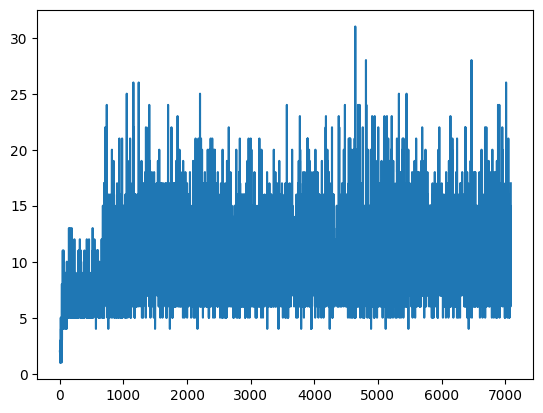

In [ ]:
plt.plot(best_score_history)

In [ ]:
0.9997**10000

0.04976466474747146

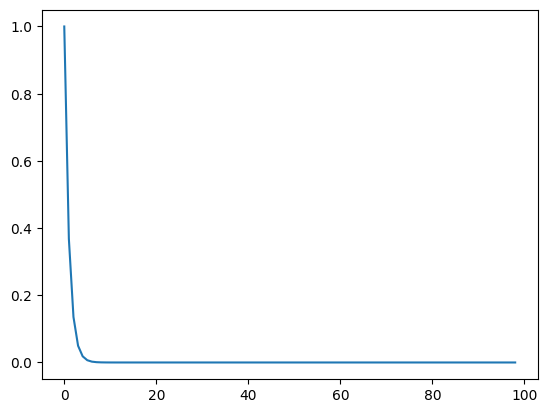

In [ ]:
fin_val = 0.01
steps = 100


x = []
for step_no in range(99):
    i =  np.exp(-1* ( step_no - steps) ) / np.exp(1*steps)
    x.append(i)
    #print(i)

plt.plot(x)

In [ ]:
arr = [-2, -1 , 0.5 , 1,2]

min([i for i in arr if i > 0]) # min positive
min([i for i in arr if i < 0]) # min negative
min(arr, key=lambda x: abs(x)) # closest to zero

0.5

In [ ]:
import math
def tanh(x):
    for i,v in enumerate(x):
        x[i]=math.tanh(v)
    return x

In [ ]:
tanh([0.1,2,20,500])

[0.09966799462495582, 0.9640275800758169, 1.0, 1.0]